Shubhasmita Roy
# Exp 7 LVQ

In [1]:
import math

In [26]:
class LVQ :
    # Function here computes the winning vector by Euclidean distance
    def winner( self, weights, sample ):
        D0 = 0
        D1 = 0
        for i in range(len(sample)):
            D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 )
            D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 )
        print("Euclidean distance from W1 = ",D0)
        print("Euclidean distance from W2 = ",D1)
        if D0 < D1:
            return 0
        else:
            return 1
        
    # Function here updates the winning vector
    def update( self, weights, sample, J, alpha):
        for i in range(0,4):
            weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )
        print("Updated Weights =",weights,"\n")

In [27]:
# Driver code
def main():
    # Training Samples ( m, n ) with their class vector
    X = [[1, 1, 0, 0], 
         [0, 0, 0, 1],
         [0, 0, 1, 1],
         [1, 0, 0, 0],
         [0, 1, 1, 0]]
    Y = [ 0, 1, 1, 0, 1 ]
    m, n = len( X ), len( X[0] )
    
    # weight initialization ( n, c )
    weights = []
    weights.append(X.pop(0))
    weights.append(X.pop(0))
    Y.pop(0) # Removing corresponding class values
    Y.pop(0)
    print("Weight vector =",weights)
    print("Input Vectors =",X)
    
    # Samples used in weight initialization will not use in training
    m = m - 2
    
    # training
    ob = LVQ()
    epochs = 1
    alpha = 0.1
    for i in range( epochs ):
        for j in range( m ):
            # Sample selection
            T = X[j]
            # Compute winner
            J = ob.winner(weights, T )
            # Update weights
            # If J and Y match, then update the weights of node as follows
            if Y[j] == J:
                ob.update(weights, T, J, alpha)
            # If J and Y don't match, then update the weights of node as follows
            else:
                ob.update(weights, T, J, -1*alpha)
            
    # classify new input sample
    T = [ 0, 0, 1, 0 ]
    J = ob.winner( weights, T )
    print("\nTESTING:\nInput Sample :",T)
    print( "PREDICTION:\nSample T belongs to class : ", J )
    print( "Trained weights : ", weights )

In [28]:
if __name__ == "__main__":
    main()

Weight vector = [[1, 1, 0, 0], [0, 0, 0, 1]]
Input Vectors = [[0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0]]
Euclidean distance from W1 =  4.0
Euclidean distance from W2 =  1.0
Updated Weights = [[1, 1, 0, 0], [0.0, 0.0, 0.1, 1.0]] 

Euclidean distance from W1 =  1.0
Euclidean distance from W2 =  2.01
Updated Weights = [[1.0, 0.9, 0.0, 0.0], [0.0, 0.0, 0.1, 1.0]] 

Euclidean distance from W1 =  2.01
Euclidean distance from W2 =  2.81
Updated Weights = [[1.1, 0.89, -0.1, 0.0], [0.0, 0.0, 0.1, 1.0]] 

Euclidean distance from W1 =  3.2121000000000004
Euclidean distance from W2 =  1.81

TESTING:
Input Sample : [0, 0, 1, 0]
PREDICTION:
Sample T belongs to class :  1
Trained weights :  [[1.1, 0.89, -0.1, 0.0], [0.0, 0.0, 0.1, 1.0]]


## Iris dataset

In [54]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.2, stratify=iris.target)

In [57]:
y_test

array([0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 0])

In [58]:
y_train

array([0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2,
       0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 2, 1, 1, 2, 1])

In [59]:
class LVQ :
    # Function here computes the winning vector by Euclidean distance
    def winner( self, weights, sample ):
        D0 = 0
        D1 = 0
        D2 = 0
        for i in range(len(sample)):
            D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 )
            D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 )
            D2 = D2 + math.pow( ( sample[i] - weights[2][i] ), 2 )
        #print("Euclidean distance from W1 = ",D0)
        #print("Euclidean distance from W2 = ",D1)
        #print("Euclidean distance from W3 = ",D2)
        if D0 == min(D0,D1,D2):
            return 0
        elif D1 == min(D0,D1,D2):
            return 1
        else:
            return 2
        
    # Function here updates the winning vector
    def update( self, weights, sample, J, alpha):
        for i in range(0,4):
            weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )
        #print("Updated Weights =",weights,"\n")

In [60]:
# Driver code
def main():
    # Training Samples ( m, n ) with their class vector
    X = X_train.values.tolist()
    Y = y_train.tolist()
    
    m, n = len(X), len(X[0])
    
    # weight initialization ( n, c )
    weights = []
    weights.append(X.pop(0))
    weights.append(X.pop(50))
    weights.append(X.pop(100))
    Y.pop(0)
    Y.pop(50)
    Y.pop(100)
    #print("Weight vector =",weights)
    #print("Input Vectors =",X)
    
    # Samples used in weight initialization will not use in training
    m = m - 3
    
    # training
    ob = LVQ()
    epochs = 1000
    alpha = 0.3
    for i in range( epochs ):
        for j in range( m ):
            # Sample selection
            T = X[j]
            # Compute winner
            J = ob.winner(weights, T )
            # Update weights
            # If J and Y match, then update the weights of node as follows
            if Y[j] == J:
                ob.update(weights, T, J, alpha)
            # If J and Y don't match, then update the weights of node as follows
            else:
                ob.update(weights, T, J, -1*alpha)
            
    # classify new input sample
    T = [5.0, 3.6, 1.4, 0.2]
    J = ob.winner( weights, T )
    print("TESTING:\nInput Sample :",T)
    print("Actual class:",0)
    print( "PREDICTION:\nSample T belongs to class : ", J )
    print( "Trained weights : ", weights )
    
    # classify new input sample
    T = [5.6,3.0,4.5,1.5]
    J = ob.winner( weights, T )
    print("\nTESTING:\nInput Sample :",T)
    print("Actual class:",1)
    print( "PREDICTION:\nSample T belongs to class : ", J )
    print( "Trained weights : ", weights )
    
    # classify new input sample
    T = [5.9,3.0,5.1,1.8]
    J = ob.winner( weights, T )
    print("\nTESTING:\nInput Sample :",T)
    print("Actual class:",2)
    print( "PREDICTION:\nSample T belongs to class : ", J )
    print( "Trained weights : ", weights )
    
    # classify new input sample
    T = [6.3,2.5,4.9,1.5]
    J = ob.winner( weights, T )
    print("\nTESTING:\nInput Sample :",T)
    print("Actual class:",1)
    print( "PREDICTION:\nSample T belongs to class : ", J )
    print( "Trained weights : ", weights )
    
    # Plotting output:
    X_t = X_test.values.tolist()
    Y_t = y_test.tolist()
    classes=[[0,0,0],[0,0,0],[0,0,0]]
    for j in range(len(X_t)):
        # Sample selection
        T = X_t[j]
        # Compute winner
        J = ob.winner(weights, T )
        if J==0 and Y_t[j]==0:
            classes[0][0]+=1
        elif J==0 and Y_t[j]==1:
            classes[1][0]+=1
        elif J==0 and Y_t[j]==2:
            classes[2][0]+=1
        elif J==1 and Y_t[j]==0:
            classes[0][1]+=1
        elif J==1 and Y_t[j]==1:
            classes[1][1]+=1
        elif J==1 and Y_t[j]==2:
            classes[2][1]+=1
        elif J==2 and Y_t[j]==0:
            classes[0][2]+=1
        elif J==2 and Y_t[j]==1:
            classes[1][2]+=1
        elif J==2 and Y_t[j]==2:
            classes[2][2]+=1
    print(classes)
    
    # Plotting
    import seaborn as sns
    import matplotlib.pyplot as plt     
    cmap = sns.light_palette("#3bbee3", as_cmap=True)
    
    ax= plt.subplot()
    sns.heatmap(classes, annot=True, cmap=cmap, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix for Iris'); 
    ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

TESTING:
Input Sample : [5.0, 3.6, 1.4, 0.2]
Actual class: 0
PREDICTION:
Sample T belongs to class :  0
Trained weights :  [[4.836537643526188, 3.317238119555861, 1.452462999978401, 0.20669987844449864], [6.231301125119039, 2.9721591714115263, 4.359524543885002, 1.376390029450927], [6.27070406796183, 3.01255248585626, 5.562911820843039, 2.2721261854498844]]

TESTING:
Input Sample : [5.6, 3.0, 4.5, 1.5]
Actual class: 1
PREDICTION:
Sample T belongs to class :  1
Trained weights :  [[4.836537643526188, 3.317238119555861, 1.452462999978401, 0.20669987844449864], [6.231301125119039, 2.9721591714115263, 4.359524543885002, 1.376390029450927], [6.27070406796183, 3.01255248585626, 5.562911820843039, 2.2721261854498844]]

TESTING:
Input Sample : [5.9, 3.0, 5.1, 1.8]
Actual class: 2
PREDICTION:
Sample T belongs to class :  2
Trained weights :  [[4.836537643526188, 3.317238119555861, 1.452462999978401, 0.20669987844449864], [6.231301125119039, 2.9721591714115263, 4.359524543885002, 1.3763900294509

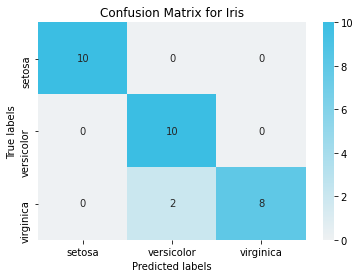

In [61]:
if __name__ == "__main__":
    main()